In [ ]:
from osgeo import gdal
import numpy as np
import pandas as pd
import os
#import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../Functions')
import TiffTools as tt

%load_ext autoreload
%autoreload 2

In [1]:
pwd

'/Users/chanagan/Documents/GitHub/ImageryResources/Notebooks'

In [ ]:
folder = '/Users/chanagan/Desktop/DGStereo/TienShan/micmac/'

In [ ]:
# Merge relevant files
inf = '/Users/chanagan/Desktop/DGStereo/TienShan/metashape/orthomosaics/2024TienShanOrthomosaic50cm.tif'
outf = folder+'mmWV2024.tif'

# Create Greyscale image RGB
# -a_ullr 799782.5,4564056.8,805922.9,4561249.6
tt.micmacExport(inf,outname=outf,srs='EPSG:32643',interp='cubic',cutlineDSName='/Users/chanagan/Desktop/DGStereo/TienShan/GIS/mmAOI2022_2024.shp',
                outres=[0.5,-0.5])

In [ ]:
# Merge relevant files
inf = '/Users/chanagan/Desktop/DGStereo/TienShan/metashape/orthomosaics/2022TienShanOrthomosaic50cm.tif'
outf = folder+'mmWV2022.tif'

# Create Greyscale image RGB
# -a_ullr 799782.5,4564056.8,805922.9,4561249.6
tt.micmacExport(inf,outname=outf,srs='EPSG:32643',interp='cubic',cutlineDSName='/Users/chanagan/Desktop/DGStereo/TienShan/GIS/mmAOI2022_2024.shp',
                outres=[0.5,-0.5])

In [ ]:
# Merge relevant files
inf = '/Users/chanagan/Desktop/DGStereo/TienShan/metashape/dems/2022TienShandem50cm.tif'
outf = folder+'demWV2022.tif'

# Create Greyscale image RGB
# -a_ullr 799782.5,4564056.8,805922.9,4561249.6
tt.micmacExport(inf,outname=outf,srs='EPSG:32643',interp='cubic',cutlineDSName='/Users/chanagan/Desktop/DGStereo/TienShan/GIS/mmAOI2022_2024.shp',
                outres=[0.5,-0.5])

In [ ]:
# Merge relevant files
inf = '/Users/chanagan/Desktop/DGStereo/TienShan/metashape/dems/2024TienShandem50cm.tif'
outf = folder+'demWV2024.tif'

# Create Greyscale image RGB
# -a_ullr 799782.5,4564056.8,805922.9,4561249.6
tt.micmacExport(inf,outname=outf,srs='EPSG:32643',interp='cubic',cutlineDSName='/Users/chanagan/Desktop/DGStereo/TienShan/GIS/mmAOI2022_2024.shp',
                outres=[0.5,-0.5])

In [ ]:
# mm3d Mm2dPosSism mmWV2022.tif mmWV2024.tif Dequant=false CorMin=0.1

In [ ]:
tt.micmacPostProcessing(folder=folder+'MEC/',
                         prefile=outf,
                         outprefix=folder)

In [ ]:
cor = gdal.Open(folder+'Correlmicmac.tif')
mask = (cor.GetRasterBand(1).ReadAsArray() > 0.5)

In [ ]:
par, perp = tt.projectDisp(folder+'EWmicmac.tif',folder+'NSmicmac.tif',240,mask=None,partif=folder+'ParallelDisp.tif',perptif=folder+'PerpendicularDisp.tif')

## Stack Results

In [ ]:
# Cut to same region 
inlist = ['/Users/chanagan/Desktop/DGStereo/TienShan/metashape/orthophotos/22DEC01083239-P1BS-016338124010_01_P001.tif',
    '/Users/chanagan/Desktop/DGStereo/TienShan/metashape/orthophotos/22DEC01083318-P1BS-016338124010_01_P001.tif',
    '/Users/chanagan/Desktop/DGStereo/TienShan/metashape/orthophotos/24FEB16060422-P1BS-016338201010_01_P001.tif',
    '/Users/chanagan/Desktop/DGStereo/TienShan/metashape/orthophotos/24FEB25055420-P1BS-016338206010_01_P001.tif']

cutline = '/Users/chanagan/Desktop/DGStereo/TienShan/GIS/mmAOI2022_2024.shp'

for file in inlist:
    tt.micmacExport(file, outname=f'/Users/chanagan/Desktop/DGStereo/TienShan/micmac/mm{file[-43:-30]}.tif', srs='EPSG:32643', outres=[0.5,-0.5], interp=None, a_ullr=None,cutlineDSName=cutline)


In [ ]:
!#/bin/bash 
mm3d Mm2dPosSism mm22DEC01083239.tif mm24FEB16060422.tif Dequant=false CorMin=0.1 DirMEC='MEC1/'
mm3d Mm2dPosSism mm22DEC01083239.tif mm24FEB25055420.tif Dequant=false CorMin=0.1 DirMEC='MEC2/'
mm3d Mm2dPosSism mm22DEC01083318.tif mm24FEB16060422.tif Dequant=false CorMin=0.1 DirMEC='MEC3/'
mm3d Mm2dPosSism mm22DEC01083318.tif mm24FEB25055420.tif Dequant=false CorMin=0.1 DirMEC='MEC4/' 

In [ ]:
folders = ['/Users/chanagan/Desktop/DGStereo/TienShan/micmac/MEC1/',
           '/Users/chanagan/Desktop/DGStereo/TienShan/micmac/MEC2/',
           '/Users/chanagan/Desktop/DGStereo/TienShan/micmac/MEC3/',
           '/Users/chanagan/Desktop/DGStereo/TienShan/micmac/MEC4/']

In [ ]:
# Projected displacements
azimuth = 240

for folder in folders:
    tt.micmacPostProcessing(folder=folder,
                         prefile='/Users/chanagan/Desktop/DGStereo/TienShan/micmac/mm24FEB16060422.tif',
                        outprefix=folder)

    #cor = gdal.Open(folder+'Correlmicmac.tif')
    #mask = (cor.GetRasterBand(1).ReadAsArray() > 0.5)
    ewtif = folder+'EWmicmac.tif'
    nstif = folder+'NSmicmac.tif'
    print('Working in',folder)
    par, perp = tt.projectDisp(ewtif,nstif,azimuth,mask=None,partif=folder+'ParallelDisp.tif',perptif=folder+'PerpendicularDisp.tif')

In [ ]:
# Add all of the tifs together
baseim = gdal.Open(folders[0]+'PerpendicularDisp.tif')
perpComb = baseim.GetRasterBand(1).ReadAsArray()
nodatamask = (baseim.GetRasterBand(1).ReadAsArray() != baseim.GetRasterBand(1).GetNoDataValue())

perpdisp = np.zeros((np.shape(perpComb)[0],np.shape(perpComb)[1],len(folders)))
perpdisp[:,:,0] = perpComb
for i,folder in enumerate(folders[1:]):
    im = gdal.Open(folder+'PerpendicularDisp.tif')
    perpdisp[:,:,i+1] = im.GetRasterBand(1).ReadAsArray()
    print('Adding displacements from',folder)
    #parComb += disp[:,:,i+1]

#parComb[~nodatamask] = baseim.GetRasterBand(1).GetNoDataValue()

In [ ]:
# Add all of the tifs together
baseim = gdal.Open(folders[0]+'ParallelDisp.tif')
parComb = baseim.GetRasterBand(1).ReadAsArray()
nodatamask = (baseim.GetRasterBand(1).ReadAsArray() != baseim.GetRasterBand(1).GetNoDataValue())

pardisp = np.zeros((np.shape(parComb)[0],np.shape(parComb)[1],len(folders)))
pardisp[:,:,0] = parComb
for i,folder in enumerate(folders[1:]):
    im = gdal.Open(folder+'ParallelDisp.tif')
    pardisp[:,:,i+1] = im.GetRasterBand(1).ReadAsArray()
    print('Adding displacements from',folder)

In [ ]:
# Add all of the tifs together
baseim = gdal.Open(folders[0]+'NSmicmac.tif')
NSComb = baseim.GetRasterBand(1).ReadAsArray()
nodatamask = (baseim.GetRasterBand(1).ReadAsArray() != baseim.GetRasterBand(1).GetNoDataValue())

NSdisp = np.zeros((np.shape(NSComb)[0],np.shape(NSComb)[1],len(folders)))
NSdisp[:,:,0] = NSComb
for i,folder in enumerate(folders[1:]):
    im = gdal.Open(folder+'NSmicmac.tif')
    NSdisp[:,:,i+1] = im.GetRasterBand(1).ReadAsArray()
    print('Adding displacements from',folder)

In [ ]:
# Add all of the tifs together
baseim = gdal.Open(folders[0]+'EWmicmac.tif')
EWComb = baseim.GetRasterBand(1).ReadAsArray()
nodatamask = (baseim.GetRasterBand(1).ReadAsArray() != baseim.GetRasterBand(1).GetNoDataValue())

EWdisp = np.zeros((np.shape(EWComb)[0],np.shape(EWComb)[1],len(folders)))
EWdisp[:,:,0] = EWComb
for i,folder in enumerate(folders[1:]):
    im = gdal.Open(folder+'EWmicmac.tif')
    EWdisp[:,:,i+1] = im.GetRasterBand(1).ReadAsArray()
    print('Adding displacements from',folder)

In [ ]:
# Add all of the correl tifs together
baseim = gdal.Open(folders[0]+'Correlmicmac.tif')

corr = np.zeros((np.shape(nodatamask)[0],np.shape(nodatamask)[1],len(folders)))
corr[:,:,0] = baseim.GetRasterBand(1).ReadAsArray()
for i,folder in enumerate(folders[1:]):
    im = gdal.Open(folder+'Correlmicmac.tif')
    corr[:,:,i+1] = im.GetRasterBand(1).ReadAsArray()
    print('Correlations saved from',folder)

corrtot = np.sum(corr,axis=2)
corrtot[~nodatamask] = baseim.GetRasterBand(1).GetNoDataValue()

In [ ]:
# Now, weight each displacement map by correlation score and temporal timeframe ()
pardisp_s = (((pardisp[:,:,0]))*corr[:,:,0]/corrtot + (pardisp[:,:,1])*corr[:,:,1]/corrtot + \
          (pardisp[:,:,2])*corr[:,:,2]/corrtot + (pardisp[:,:,3])*corr[:,:,3]/corrtot)
         

pardisp_s[~nodatamask] = -9999

In [ ]:
# Now, weight each displacement map by correlation score and temporal timeframe ()
perpdisp_s = (((perpdisp[:,:,0]))*corr[:,:,0]/corrtot + (perpdisp[:,:,1])*corr[:,:,1]/corrtot + \
          (perpdisp[:,:,2])*corr[:,:,2]/corrtot + (perpdisp[:,:,3])*corr[:,:,3]/corrtot)
         

perpdisp_s[~nodatamask] = -9999

In [ ]:
# Now, weight each displacement map by correlation score and temporal timeframe ()
NSdisp_s = (((NSdisp[:,:,0]))*corr[:,:,0]/corrtot + (NSdisp[:,:,1])*corr[:,:,1]/corrtot + \
          (NSdisp[:,:,2])*corr[:,:,2]/corrtot + (NSdisp[:,:,3])*corr[:,:,3]/corrtot)
         

NSdisp_s[~nodatamask] = -9999

In [ ]:
# Now, weight each displacement map by correlation score and temporal timeframe ()
EWdisp_s = (((EWdisp[:,:,0]))*corr[:,:,0]/corrtot + (EWdisp[:,:,1])*corr[:,:,1]/corrtot + \
          (EWdisp[:,:,2])*corr[:,:,2]/corrtot + (EWdisp[:,:,3])*corr[:,:,3]/corrtot)
         

EWdisp_s[~nodatamask] = -9999

In [ ]:
tt.save_geotiff(perpdisp_s,'/Users/chanagan/Desktop/DGStereo/TienShan/micmac/PerpendicularDispStacked.tif',baseim.GetGeoTransform(),baseim.GetProjection())
tt.save_geotiff(pardisp_s,'/Users/chanagan/Desktop/DGStereo/TienShan/micmac/ParallelDispStacked.tif',baseim.GetGeoTransform(),baseim.GetProjection())
tt.save_geotiff(NSdisp_s,'/Users/chanagan/Desktop/DGStereo/TienShan/micmac/NSDispStacked.tif',baseim.GetGeoTransform(),baseim.GetProjection())
tt.save_geotiff(EWdisp_s,'/Users/chanagan/Desktop/DGStereo/TienShan/micmac/EWDispStacked.tif',baseim.GetGeoTransform(),baseim.GetProjection())
tt.save_geotiff(corrtot,'CorrelStacked.tif',baseim.GetGeoTransform(),baseim.GetProjection())

# Vertical Displacements

In [ ]:
dem1file = '/Users/chanagan/Desktop/DGStereo/TienShan/micmac/demWV2022.tif'
dem2file = '/Users/chanagan/Desktop/DGStereo/TienShan/micmac/demWV2024.tif'
nsfile = '/Users/chanagan/Desktop/DGStereo/TienShan/micmac/NSDispStacked.tif'
ewfile = '/Users/chanagan/Desktop/DGStereo/TienShan/micmac/EWDispStacked.tif'

In [ ]:
#Simple dem difference
dem1 = gdal.Open(dem1file)
dem2 = gdal.Open(dem2file)
nodata = dem1.GetRasterBand(1).GetNoDataValue()
dem_diff = dem2.GetRasterBand(1).ReadAsArray() - dem1.GetRasterBand(1).ReadAsArray()
nodata_mask = (dem1.GetRasterBand(1).ReadAsArray() != nodata)
dem_diff[~nodata_mask] = nodata
tt.save_geotiff(dem_diff,'/Users/chanagan/Desktop/DGStereo/TienShan/micmac/DEMdiff.tif', dem1.GetGeoTransform(), dem1.GetProjection(),nodata=nodata)

In [ ]:
# This takes time 
U = tt.verticalDisp(dem1file,dem2file,nsfile,ewfile,outf='/Users/chanagan/Desktop/DGStereo/TienShan/micmac/VerticalDisp.tif')


In [ ]:
# Use correlation file to produce mask
cor = gdal.Open(folder+'Correlmicmac.tif')
mask = (cor.GetRasterBand(1).ReadAsArray() > 0.5)
U[~mask] = -9999
tt.save_geotiff(U,'/Users/chanagan/Desktop/DGStereo/TienShan/micmac/VerticalDispMasked.tif', dem1.GetGeoTransform(), dem1.GetProjection(),nodata=nodata)

## Destripe

In [ ]:
# Destripe vertical lines
files = ['/Users/chanagan/Desktop/DGStereo/TienShan/micmac/ParallelDispStacked.tif',
         '/Users/chanagan/Desktop/DGStereo/TienShan/micmac/PerpendicularDispStacked.tif',
        '/Users/chanagan/Desktop/DGStereo/TienShan/micmac/NSDispStacked.tif',
         '/Users/chanagan/Desktop/DGStereo/TienShan/micmac/EWDispStacked.tif',
         '/Users/chanagan/Desktop/DGStereo/TienShan/micmac/VerticalDisp.tif']
for file in files:
    im = gdal.Open(file)
    nsorg = im.GetRasterBand(1).ReadAsArray()
    nodatamask = ((nsorg != im.GetRasterBand(1).GetNoDataValue())&
                  (nsorg >= -10) &
                  (nsorg <= 10))
    nsorg[~nodatamask] = np.nan

    nsdestriped = np.zeros(np.shape(nsorg))
    for col in range(0,im.RasterXSize):
        # remove median from column to remove vertical striping
        nsdestriped[:,col] = nsorg[:,col] - np.nanmean(nsorg[:,col])

    nodatamask = ((nsdestriped != im.GetRasterBand(1).GetNoDataValue())&
                  (nsdestriped >= -3) &
                  (nsdestriped <= 3)&
                  (nsdestriped != np.nan))
    nsdestriped[~nodatamask] = im.GetRasterBand(1).GetNoDataValue()
    tt.save_geotiff(nsdestriped,file[:-4]+'Destriped.tif',im.GetGeoTransform(),im.GetProjection())

## Profiles along a line

In [1]:
import pygmt
from osgeo import gdal
import pandas as pd
import numpy as np
import rioxarray
from pyproj import Geod
g = Geod(ellps='WGS84')

import matplotlib.pyplot as plt
from scipy import stats

In [2]:
#!gdalwarp -overwrite -t_srs EPSG:4326 -r bilinear -dstnodata -9999.0 -of GTiff /Users/chanagan/Desktop/DGStereo/TienShan/micmac/PerpendicularDispStackedDestriped.tif /Users/chanagan/Desktop/DGStereo/TienShan/micmac/PerpendicularDispStackedEPSG4326.tif
#!gdalwarp -overwrite -t_srs EPSG:4326 -r bilinear -dstnodata -9999.0 -of GTiff /Users/chanagan/Desktop/DGStereo/TienShan/micmac/VerticalDispDestriped.tif /Users/chanagan/Desktop/DGStereo/TienShan/micmac/VerticalDispEPSG4326.tif
#!gdalwarp -overwrite -t_srs EPSG:4326 -r bilinear -dstnodata -9999.0 -of GTiff /Users/chanagan/Desktop/DGStereo/TienShan/micmac/ParallelDispStackedDestriped.tif /Users/chanagan/Desktop/DGStereo/TienShan/micmac/ParallelDispStackedEPSG4326.tif

In [3]:
#!gdalwarp -overwrite -t_srs EPSG:4326 -r bilinear -dstnodata -9999.0 -of GTiff /Users/chanagan/Desktop/DGStereo/TienShan/Results/EWDispStackedDestriped.tif /Users/chanagan/Desktop/DGStereo/TienShan/micmac/EWDispStackedEPSG4326.tif
#!gdalwarp -overwrite -t_srs EPSG:4326 -r bilinear -dstnodata -9999.0 -of GTiff /Users/chanagan/Desktop/DGStereo/TienShan/Results/NSDispStackedDestriped.tif /Users/chanagan/Desktop/DGStereo/TienShan/micmac/NSDispStackedEPSG4326.tif

In [4]:
#!gdalwarp -overwrite -t_srs EPSG:4326 -dstnodata -9999.0 -r bilinear -of GTiff /Volumes/Extreme\ Pro/Projects/TienShan/insar/s1_20240126_20240207_p56_unw.tif /Volumes/Extreme\ Pro/Projects/TienShan/insar/s1_20240126_20240207_p56_unwEPSG4326.tif

In [2]:
# Profile for crossprofiles
endpts = np.array([[78.5842320602900202,41.1471762414386362],
                [78.6387705909006627,41.1705895995165534]])

line = g.inv_intermediate(endpts[0][0], endpts[0][1], endpts[1][0], endpts[1][1],npts=26,return_back_azimuth=False)

pts = np.array(list(map(lambda i: [line.lons[i],line.lats[i]],np.arange(len(line.lons)))))

# 2D distance between each stack
az1, az2, dist = g.inv(pts[0][0], pts[0][1], pts[1][0], pts[1][1])
tmp1, tmp2, dist2 = g.inv(endpts[0][0], endpts[0][1], endpts[1][0], endpts[1][1])
dist, dist2

(194.9826735276821, 5264.5321852878105)

In [9]:
#NOTE: Computer runs out of memory if they are all run at one. Need to save file then open later.
# GMT operates with 0-255 range values. Displacement will not be more than 255 meters unless there is a problem, so I will clamp anything out of range to 0
# and requires xarray data format
imlist = ['/Users/chanagan/Desktop/DGStereo/TienShan/Results/PerpendicularDispStackedEPSG4326.tif',
'/Users/chanagan/Desktop/DGStereo/TienShan/Results/ParallelDispStackedEPSG4326.tif',
'/Users/chanagan/Desktop/DGStereo/TienShan/Results/VerticalDispEPSG4326.tif']


In [3]:
# Define crossprofile 
crossLength = 1000
crossSample = 0.5
crossSpacing = 0.5

In [11]:


for image in imlist:
    im = rioxarray.open_rasterio(image)
    # Get mask and Shift data so that the minimum is zero
    fillvalue = im._FillValue
    mask = ((im != fillvalue) & (im < 255 ) & (im != np.nan)).data
    # Rescale so that negative values are shifted up to 0 or greater
    if im.data[mask].min() < 0:
        im.data[mask] -= im.data[mask].min()
    # set nodata to zero
    im.data[~mask] = 0
    disparr = im.astype(np.double)
    # Create crossprofiles along a line
    # 2 endpoints provided in pts
    # crossprofiles are length/sample spacing along profile/space between each profile
    # e is the unit notation for meter
    # stack a means the mean value (a is average) appended to each profile (+a), +da appends standard deviation too
    # Output is lon, lat, dist, azimuth,value of grid, mean of stack, stdev of stack
    track = pd.DataFrame(columns=['id','lon','lat','linedist','az','val','stackmean','stdev'])
    for i in range(0,len(pts)-1):
        tmp = pygmt.grdtrack(disparr,points=np.array([pts[i],pts[i+1]]),binary='id',
                                crossprofile=f'{crossLength}e/{crossSample}e/{crossSpacing}e',stack='a+a+dm')
        tmp.columns = ['lon','lat','linedist','az','val','stackmean','stdev']
        tmp['id'] = np.ones(len(tmp))*i
        # replace lon of individual profile with center of stack
        tmp['lon'] = np.ones(len(tmp))*tmp['lon'][tmp.linedist == 0].median()
        tmp['lat'] = np.ones(len(tmp))*tmp['lat'][tmp.linedist == 0].median()
        track = pd.concat([track,tmp[0:int(crossLength/crossSample)+1]],axis=0,ignore_index=True)
    track.drop(columns=['val'],inplace=True)
    print('Hi')

    if image is imlist[0]:
        track.to_csv('/Users/chanagan/Desktop/DGStereo/TienShan/micmac/PerpendicularProfiles.txt')
    elif image is imlist[1]:
        track.to_csv('/Users/chanagan/Desktop/DGStereo/TienShan/micmac/ParallelProfiles.txt')
    elif image is imlist[2]:
        track.to_csv('/Users/chanagan/Desktop/DGStereo/TienShan/micmac/VerticalProfiles.txt')


/Users/chanagan/miniconda3/envs/pygmt/lib/python3.12/site-packages/pygmt/src/grdtrack.py:309: RuntimeWarning: Input image has dtype: float64 which is unsupported, and may result in an incorrect output. Please recast image to a uint8 dtype and/or scale to 0-255 range, e.g. using a histogram equalization function like skimage.exposure.equalize_hist.
  lib.virtualfile_in(check_kind="raster", data=grid) as vingrd,
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_81719/2099778944.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  track = pd.concat([track,tmp[0:int(crossLength/crossSample)+1]],axis=0,ignore_index=True)
/Users/chanagan/miniconda3/envs/pygmt/lib/python3.12/site-packages/pygmt/src/grdtrack.py:309: RuntimeWarning: Input i

Hi


/Users/chanagan/miniconda3/envs/pygmt/lib/python3.12/site-packages/pygmt/src/grdtrack.py:309: RuntimeWarning: Input image has dtype: float64 which is unsupported, and may result in an incorrect output. Please recast image to a uint8 dtype and/or scale to 0-255 range, e.g. using a histogram equalization function like skimage.exposure.equalize_hist.
  lib.virtualfile_in(check_kind="raster", data=grid) as vingrd,
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_81719/2099778944.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  track = pd.concat([track,tmp[0:int(crossLength/crossSample)+1]],axis=0,ignore_index=True)
/Users/chanagan/miniconda3/envs/pygmt/lib/python3.12/site-packages/pygmt/src/grdtrack.py:309: RuntimeWarning: Input i

Hi


/Users/chanagan/miniconda3/envs/pygmt/lib/python3.12/site-packages/pygmt/src/grdtrack.py:309: RuntimeWarning: Input image has dtype: float64 which is unsupported, and may result in an incorrect output. Please recast image to a uint8 dtype and/or scale to 0-255 range, e.g. using a histogram equalization function like skimage.exposure.equalize_hist.
  lib.virtualfile_in(check_kind="raster", data=grid) as vingrd,
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_81719/2099778944.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  track = pd.concat([track,tmp[0:int(crossLength/crossSample)+1]],axis=0,ignore_index=True)
/Users/chanagan/miniconda3/envs/pygmt/lib/python3.12/site-packages/pygmt/src/grdtrack.py:309: RuntimeWarning: Input i

Hi


## Figures of Profile Results

In [4]:
perpdf = pd.read_csv('/Users/chanagan/Desktop/DGStereo/TienShan/Results/PerpendicularProfiles.txt')
pardf = pd.read_csv('/Users/chanagan/Desktop/DGStereo/TienShan/Results/ParallelProfiles.txt')
vertdf = pd.read_csv('/Users/chanagan/Desktop/DGStereo/TienShan/Results/VerticalProfiles.txt')


0.0 0.08287655858472798
1.0 0.15059928881471363
2.0 0.1519582345350443
3.0 0.2570419058197433
4.0 0.25111824148939066
5.0 0.3158599720587856
6.0 0.1499507020538302
7.0 0.26661037587869396
8.0 0.1766133183763099
9.0 0.13174730051407035
10.0 -0.042382411224251015
11.0 0.4068265140183098
12.0 0.6403830162835997
13.0 0.36256734895290244
14.0 0.5323522484821956
15.0 0.648641775636305
16.0 0.4420658335361747
17.0 0.26608358992954484
18.0 0.16898469027447627
19.0 0.2840471599644814
20.0 0.08849834063352002
21.0 0.19934953544541534
22.0 0.09316489125894378
23.0 -0.05245661956927439
24.0 0.1227856651901642
0.0 -0.06830201856292062
1.0 -0.028721771134109897
2.0 0.12468411833275184
3.0 0.2166368558173466
4.0 0.07592450624641778
5.0 -0.012584641393072804
6.0 0.12039426879720594
7.0 0.0037716244404313315
8.0 -0.01633030236553834
9.0 -0.13721289088732602
10.0 -0.57929760198195
11.0 -0.5250760725663928
12.0 -0.5042120132596377
13.0 -0.32188164967017485
14.0 -0.33270909062279364
15.0 -0.04280634874514

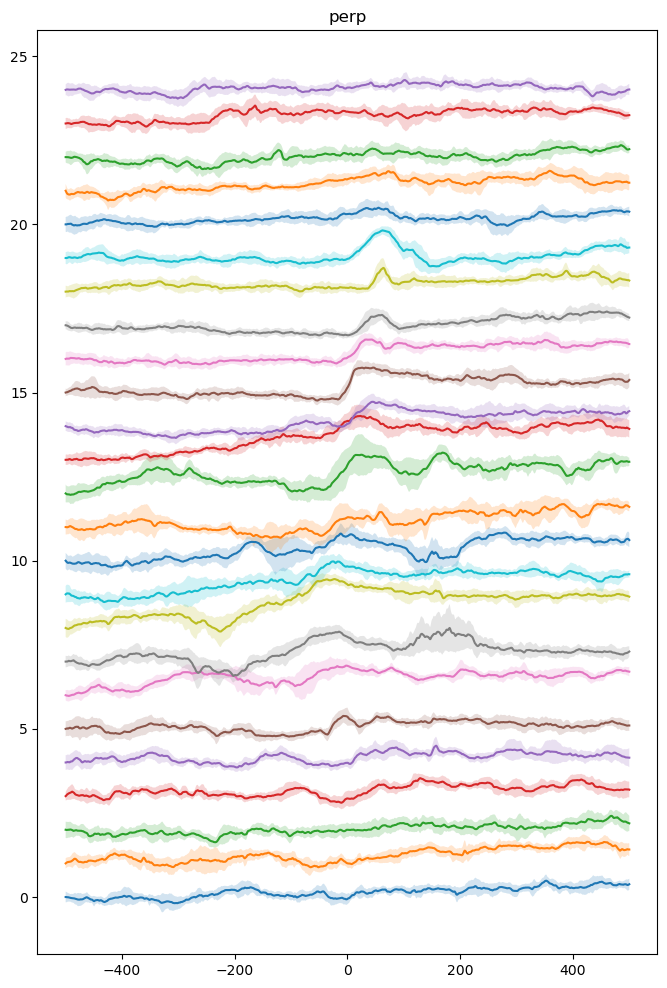

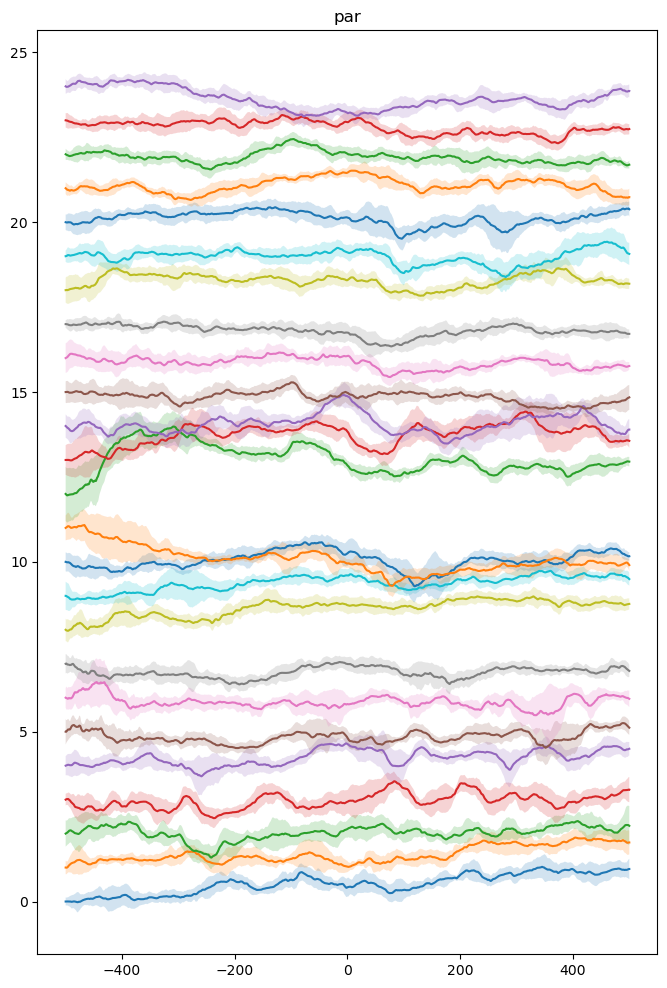

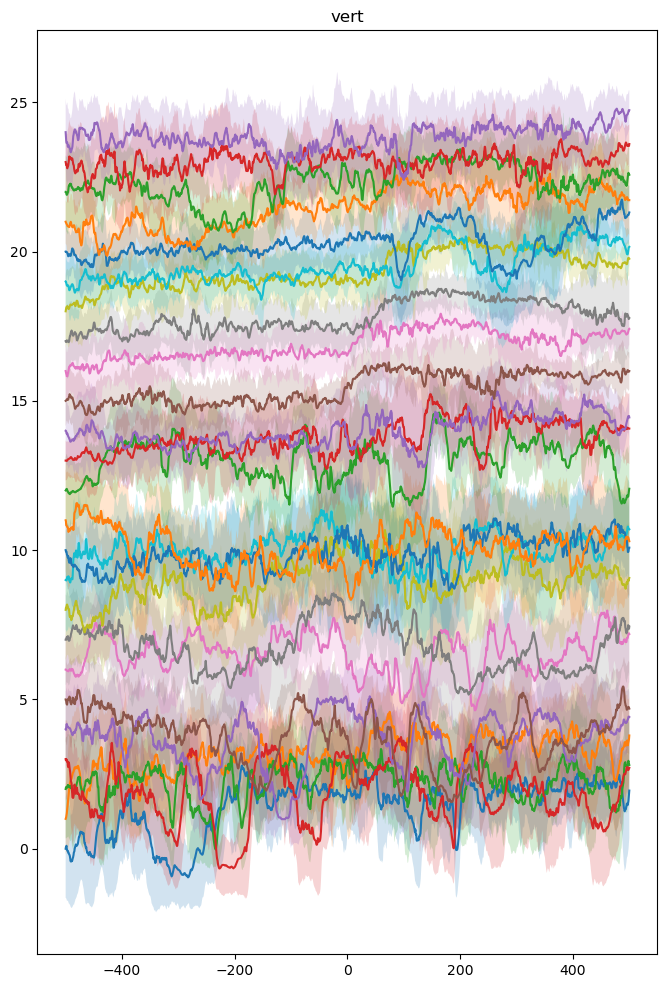

In [5]:
shift = 1
# Profile taken at 
bmin, bmax = int(300/crossSample),int(500/crossSample)#150,250
meandisp = {'perp':[],'par':[],'vert':[]}
stdev = {'perp':[],'par':[],'vert':[]}
trackdist = {'perp':[],'par':[],'vert':[]}
centerlats = {'perp':[],'par':[],'vert':[]}
centerlons = {'perp':[],'par':[],'vert':[]}
for track,j in zip([perpdf,pardf,vertdf],meandisp.keys()):
    plt.figure(figsize=(8,12))
    plt.title(j)
    for i in track.id.unique():
        prof = track[track.id==i]
        print(i,prof[-bmax:-bmin].stackmean.mean()-prof[bmin:bmax].stackmean.mean())
        meandisp[j].append(prof[-bmax:-bmin].stackmean.mean()-prof[bmin:bmax].stackmean.mean())
        stdev[j].append(np.std(prof[-bmax:-bmin].stackmean.values-prof[bmin:bmax].stackmean.values))
        trackdist[j].append(dist*(i+1))
        if i == np.median(track.id.unique()):
            centerlons = prof.lon.unique()
            centerlats = prof.lat.unique()
        plt.plot(prof.linedist,prof.stackmean-prof.stackmean.iloc[0]+i*shift)
        plt.fill_between(prof.linedist,(prof.stackmean-prof.stackmean.iloc[0]+i*shift)-prof.stdev,(prof.stackmean-prof.stackmean.iloc[0]+i*shift)+prof.stdev,alpha=0.2)

#plt.ylim([-6,i*shift+6])

In [9]:
dips = np.arctan(np.abs(np.array(meandisp['vert']))/np.abs(np.array(meandisp['perp'])))*180/np.pi
rakes = list(map(lambda i:np.angle(complex(-1*meandisp['par'][i],(meandisp['perp'][i]*np.cos(dips[i]*np.pi/180)+meandisp['vert'][i]*np.sin(dips[i]*np.pi/180))))*180/np.pi,np.arange(0,len(meandisp['par']))))
total_slip = np.sqrt(np.array(meandisp['par'])**2+np.array(meandisp['perp'])**2+np.array(meandisp['vert'])**2)

In [10]:
np.mean(total_slip), np.max(total_slip)

(0.6194872919706996, 1.1485782353640037)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


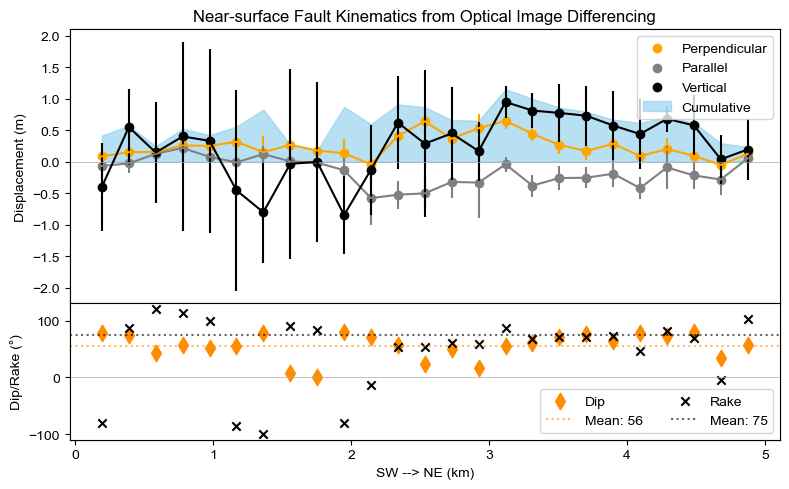

In [13]:
plt.close()
plt.rcParams['font.family'] = 'Arial'
plt.figure(figsize=(8,5))
plt.yticks([])
plt.xticks([])
plt.title(f'Near-surface Fault Kinematics from Optical Image Differencing')
# Displamcents
plt.subplot(3,1,(1,2))
#plt.ylim(-1.2, 2.5)
plt.xticks([])
for key,c in zip (meandisp.keys(),['orange','grey','black']):
    # Each slip component with error
    plt.errorbar(np.array(trackdist[key])/1000,np.array(meandisp[key]),yerr=stdev[key],c=c)
    plt.scatter(np.array(trackdist[key])/1000,np.array(meandisp[key]),c=c)
# Total 
plt.fill_between(np.array(trackdist[key])/1000,total_slip,
         color='skyblue',alpha=0.6,zorder=0)
plt.legend(['Perpendicular','Parallel','Vertical','Cumulative'],loc='upper right')
plt.axhline(0,c='darkgrey',linewidth=0.5)
plt.ylabel('Displacement (m)')
# Dip
plt.subplot(3,1,3)
plt.ylabel('Dip/Rake (°)')
plt.xlabel('SW --> NE (km)')
plt.scatter(np.array(trackdist[key])/1000,dips,marker='d',s=70,c='darkorange')
plt.axhline(np.mean(np.abs(dips)),linestyle=':',c='darkorange',alpha=0.6)
plt.scatter(np.array(trackdist[key])/1000,rakes,marker='x',color='black')
plt.axhline(np.average(np.abs(rakes)),linestyle=':',c='black',alpha=0.6)
plt.legend(['Dip',f'Mean: {int(np.round(np.average(np.abs(dips))))}', \
            'Rake',f'Mean: {int(np.round(np.average(np.abs(rakes))))}'],ncol=2)
plt.axhline(0,c='darkgrey',linewidth=0.5)
plt.tight_layout(h_pad=-0)
#plt.savefig('/Users/chanagan/Desktop/DGStereo/TienShan/Results/TienShanOpticalResults.eps',transparent=True,dpi=300)

In [21]:
150-90

60

In [ ]:
im1 = rioxarray.open_rasterio('/Users/chanagan/Desktop/DGStereo/TienShan/micmac/PerpendicularDispStackedEPSG4326.tif')
im2 = rioxarray.open_rasterio('/Users/chanagan/Desktop/DGStereo/TienShan/micmac/ParallelDispStackedEPSG4326.tif')
im3 = rioxarray.open_rasterio('/Users/chanagan/Desktop/DGStereo/TienShan/micmac/VerticalDispEPSG4326.tif')

baseim = gdal.Open('/Users/chanagan/Desktop/DGStereo/TienShan/micmac/VerticalDispEPSG4326.tif')

In [ ]:
mask = (im1.values[0] != -9999)
cumdisp = np.sqrt(im1.values[0]**2+im2.values[0]**2+im3.values[0]**2)
cumdisp[~mask] = -9999
#tt.save_geotiff(cumdisp,'/Users/chanagan/Desktop/DGStereo/TienShan/micmac/CumulativeDispStacked.tif',baseim.GetGeoTransform(),baseim.GetProjection(),nodata=-9999)



In [37]:
direction = 'Vertical'
trackdf = pd.read_csv(f'/Users/chanagan/Desktop/DGStereo/TienShan/Results/{direction}Profiles.txt')
track = trackdf[trackdf.linedist == 0]
#cumdisp = f'/Users/chanagan/Desktop/DGStereo/TienShan/Results/{direction}DispStackedEPSG4326.tif'
cumdisp = f'/Users/chanagan/Desktop/DGStereo/TienShan/Results/{direction}DispEPSG4326.tif'


colorbar [WARNING]: gmt_flip_justify called with incorrect argument (-99)
/Users/chanagan/miniconda3/envs/pygmt/lib/python3.12/site-packages/pyproj/geod.py:312: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return self._fwd_point(


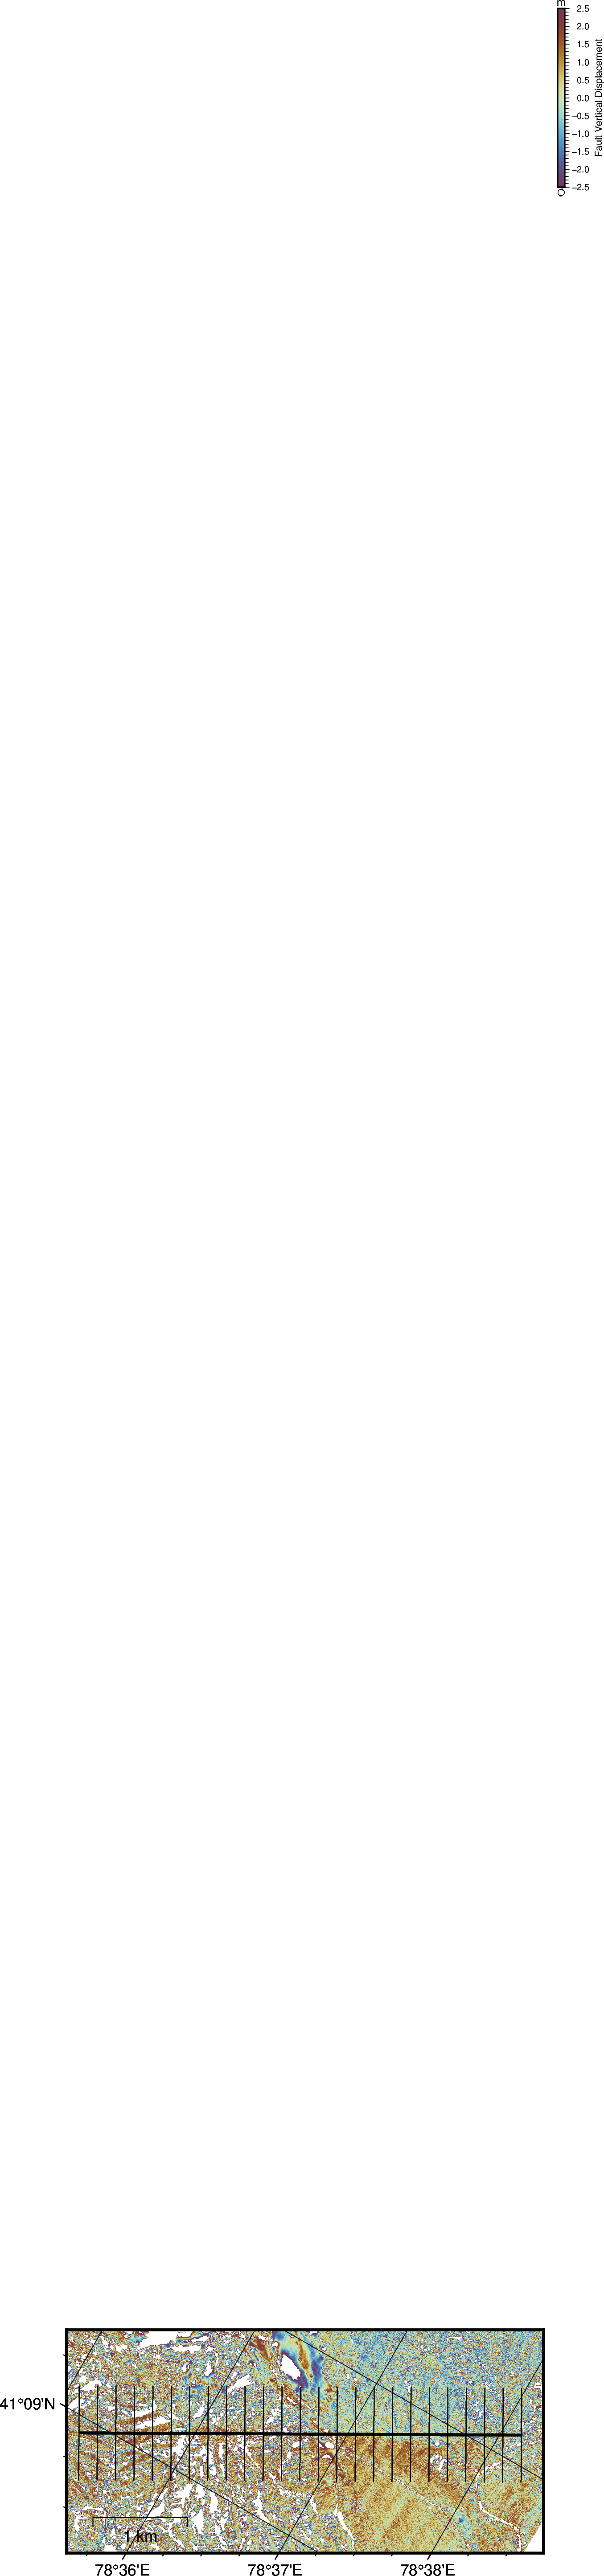

In [38]:
# MAP
region = [78.5935,41.138,78.6315,41.179]## #41.13531,78.58245 41.18167,78.63825
fig = pygmt.Figure()
# Config
pygmt.config(FONT_LABEL="11p")

fig.basemap(
    region=f'{region[0]}/{region[1]}/{region[2]}/{region[3]}+r',projection="oa78.6/41.15/60/200c",frame='a')

pygmt.makecpt(cmap='romaO',series=[-2.5,2.5],background='o',reverse=True)
fig.grdimage(cumdisp)#,#cmap='blue,yellow,red')
fig.colorbar(position='JMR+0-0.5c/150c',
             frame=[f"xa0.5f0.1+lFault {direction} Displacement", "y+lm"])
# Set up basic map
fig.basemap(
    region=f'{region[0]}/{region[1]}/{region[2]}/{region[3]}+r', # Set bottom left and top right coordinates of the figure with "+r"
    projection="oa78.6/41.15/60/200c",  # Mercator projection with a width of 12 centimeters
    frame="afg",map_scale='jBL+w1k+o0.5c/0.5c'
)

fig.plot(x=track.lon,y=track.lat,pen='1.5p,black')
for i in range(0,len(track.lon.unique())):
    tmp = track[track.lon == track.lon.unique()[i]]
    lon1, lat1, azs =  g.fwd(tmp.lon,tmp.lat,az=tmp.az,dist=crossLength/2)
    lon2, lat2, azs =  g.fwd(tmp.lon,tmp.lat,az=tmp.az-180,dist=crossLength/2)
    fig.plot(x=np.array([lon1,lon2]).flatten(),y=np.array([lat1,lat2]).flatten(),pen='0.5p,black')

fig.show()
#fig.savefig(f'/Users/chanagan/Desktop/DGStereo/TienShan/Results/{direction}Map.eps',dpi=300)

In [39]:
240+90

330

## InSAR Analysis

The LOS files are 2-band images, incidence angle in band 1, azimuth angle in band 2. You can convert those into x, y, and z vectors with the following

azi = 180 – azi;

SX = sin(azi) * sin(inc)

SY = cos(azi) * sin(inc)

SZ = -cos(inc)

In [ ]:
from osgeo import gdal
import numpy as np
import rioxarray
import pandas as pd
import matplotlib.pyplot as plt
import pygmt
import sys
sys.path.append('../Functions')
import TiffTools as tt

from pyproj import Geod
g = Geod(ellps='WGS84')

In [ ]:
#!gdalwarp -overwrite -r near -tr 0.0002778  0.0002778 -te 78.55807239388925 41.11930629576476 78.64641440184518 41.203767516977244 -of GTiff /Users/chanagan/Desktop/DGStereo/TienShan/insar/fromBill/s1_20240125_20240206_p34_los.tif /Users/chanagan/Desktop/DGStereo/TienShan/insar/fromBill/s1_20240125_20240206_p34_losclipped.tif
#!gdalwarp -overwrite -r near -tr 0.0002778  0.0002778 -te 78.55807239388925 41.11930629576476 78.64641440184518 41.203767516977244 -of GTiff /Users/chanagan/Desktop/DGStereo/TienShan/insar/fromBill/s1_20240126_20240207_p56_los.tif /Users/chanagan/Desktop/DGStereo/TienShan/insar/fromBill/s1_20240126_20240207_p56_losclipped.tif

In [ ]:
#!gdalwarp -overwrite -r near -tr  0.0002778  0.0002778 -te 78.55807239388925 41.11930629576476 78.64641440184518 41.203767516977244 -of GTiff /Users/chanagan/Desktop/DGStereo/TienShan/Results/EWDispStackedEPSG4326.tif /Users/chanagan/Desktop/DGStereo/TienShan/Results/EWDispStacked30mEPSG4326.tif
#!gdalwarp -overwrite -r near -tr  0.0002778  0.0002778 -te 78.55807239388925 41.11930629576476 78.64641440184518 41.203767516977244 -of GTiff /Users/chanagan/Desktop/DGStereo/TienShan/Results/NSDispStackedEPSG4326.tif /Users/chanagan/Desktop/DGStereo/TienShan/Results/NSDispStacked30mEPSG4326.tif
#!gdalwarp -overwrite -r near -tr  0.0002778  0.0002778 -te 78.55807239388925 41.11930629576476 78.64641440184518 41.203767516977244 -of GTiff /Users/chanagan/Desktop/DGStereo/TienShan/Results/VerticalDispEPSG4326.tif /Users/chanagan/Desktop/DGStereo/TienShan/Results/VerticalDisp30mEPSG4326.tif

In [ ]:
# Project disp maps into LOS
los34 = gdal.Open('/Users/chanagan/Desktop/DGStereo/TienShan/insar/fromBill/s1_20240125_20240206_p34_losclipped.tif')
los56 = gdal.Open('/Users/chanagan/Desktop/DGStereo/TienShan/insar/fromBill/s1_20240126_20240207_p56_losclipped.tif')



In [ ]:
sx34 = np.sin((180-los34.GetRasterBand(2).ReadAsArray())*np.pi/180)*np.sin(los34.GetRasterBand(1).ReadAsArray()*np.pi/180)
sy34 = np.cos((180-los34.GetRasterBand(2).ReadAsArray())*np.pi/180)*np.sin(los34.GetRasterBand(1).ReadAsArray()*np.pi/180)
sz34 = -1*np.cos(los34.GetRasterBand(1).ReadAsArray()*np.pi/180)

sx56 = np.sin((180-los56.GetRasterBand(2).ReadAsArray())*np.pi/180)*np.sin(los56.GetRasterBand(1).ReadAsArray()*np.pi/180)
sy56 = np.cos((180-los56.GetRasterBand(2).ReadAsArray())*np.pi/180)*np.sin(los56.GetRasterBand(1).ReadAsArray()*np.pi/180)
sz56 = -1*np.cos(los56.GetRasterBand(1).ReadAsArray()*np.pi/180)

In [ ]:
dsew = gdal.Open('/Users/chanagan/Desktop/DGStereo/TienShan/Results/EWDispStacked30mEPSG4326.tif')
dx = dsew.GetRasterBand(1).ReadAsArray()
dsns = gdal.Open('/Users/chanagan/Desktop/DGStereo/TienShan/Results/NSDispStacked30mEPSG4326.tif')
dy = dsns.GetRasterBand(1).ReadAsArray()
dsud = gdal.Open('/Users/chanagan/Desktop/DGStereo/TienShan/Results/VerticalDisp30mEPSG4326.tif')
dz = dsud.GetRasterBand(1).ReadAsArray()



nodatamask = ((dsew.GetRasterBand(1).ReadAsArray() != dsew.GetRasterBand(1).GetNoDataValue()) &
                (dsns.GetRasterBand(1).ReadAsArray() != dsns.GetRasterBand(1).GetNoDataValue()) &
                (dsud.GetRasterBand(1).ReadAsArray() != dsud.GetRasterBand(1).GetNoDataValue()))

losProj = sx34*dx+sy34*dy+sz34*dz
losProj[~nodatamask] = -9999
#tt.save_geotiff(losProj,'/Users/chanagan/Desktop/DGStereo/TienShan/Results/OpticalProjectedLOSp34.tif',geotransform=dsew.GetGeoTransform(), 
#                projection=dsew.GetProjection(),nodata=-9999)

losProj = sx56*dx+sy56*dy+sz56*dz
losProj[~nodatamask] = -9999
#tt.save_geotiff(losProj,'/Users/chanagan/Desktop/DGStereo/TienShan/Results/OpticalProjectedLOSp56.tif',geotransform=dsew.GetGeoTransform(), 
#                projection=dsew.GetProjection(),nodata=-9999)

In [ ]:
# Profile for crossprofiles
endpts = np.array([[78.5842320602900202,41.1471762414386362],
                [78.6387705909006627,41.1705895995165534]])

line = g.inv_intermediate(endpts[0][0], endpts[0][1], endpts[1][0], endpts[1][1],npts=26,return_back_azimuth=False)

pts = np.array(list(map(lambda i: [line.lons[i],line.lats[i]],np.arange(len(line.lons)))))

# 2D distance between each stack
az1, az2, dist = g.inv(pts[0][0], pts[0][1], pts[1][0], pts[1][1])
tmp1, tmp2, dist2 = g.inv(endpts[0][0], endpts[0][1], endpts[1][0], endpts[1][1])
dist, dist2

In [ ]:
# Define crossprofile 
# 6000 for LOS! To avoid unwrapping errors, less for optical
crossLength = 6000
crossSample = 30
crossSpacing = 30

In [ ]:
crossLength

In [ ]:
# For LOS 
imlist = ['/Users/chanagan/Desktop/DGStereo/TienShan/insar/fromBill/s1_20240126_20240207_p56_unw.tif',
         '/Users/chanagan/Desktop/DGStereo/TienShan/insar/fromBill/s1_20240125_20240206_p34_unw.tif',
         '/Users/chanagan/Desktop/DGStereo/TienShan/Results/OpticalProjectedLOSp34.tif',
         '/Users/chanagan/Desktop/DGStereo/TienShan/Results/OpticalProjectedLOSp56.tif']

for image in imlist[2:]:
    im = rioxarray.open_rasterio(image)
    # Get mask and Shift data so that the minimum is zero
    fillvalue = im._FillValue
    mask = ((im != fillvalue) & (im < 255 ) & (im != np.nan)).data
    # Rescale so that negative values are shifted up to 0 or greater
    if im.data[mask].min() < 0:
        im.data[mask] -= im.data[mask].min()
    # set nodata to zero
    im.data[~mask] = 0
    disparr = im.astype(np.double)
    # Create crossprofiles along a line
    # 2 endpoints provided in pts
    # crossprofiles are length/sample spacing along profile/space between each profile
    # e is the unit notation for meter
    # stack a means the mean value (a is average) appended to each profile (+a), +da appends standard deviation too
    # Output is lon, lat, dist, azimuth,value of grid, mean of stack, stdev of stack
    track = pd.DataFrame(columns=['id','lon','lat','linedist','az','val','stackmean','stdev'])
    for i in range(0,len(pts)-1):
        tmp = pygmt.grdtrack(disparr,points=np.array([pts[i],pts[i+1]]),binary='id',
                                crossprofile=f'{crossLength}e/{crossSample}e/{crossSpacing}e',stack='a+a+dm')
        tmp.columns = ['lon','lat','linedist','az','val','stackmean','stdev']
        tmp['id'] = np.ones(len(tmp))*i
        # replace lon of individual profile with center of stack
        tmp['lon'] = np.ones(len(tmp))*tmp['lon'][tmp.linedist == 0].median()
        tmp['lat'] = np.ones(len(tmp))*tmp['lat'][tmp.linedist == 0].median()
        track = pd.concat([track,tmp[0:int(crossLength/crossSample)+1]],axis=0,ignore_index=True)
    track.drop(columns=['val'],inplace=True)
    print('Hi')

    if image is imlist[0]:
        track.to_csv('/Users/chanagan/Desktop/DGStereo/TienShan/micmac/s1_20240126_20240207_p56Profiles.txt')
    elif image is imlist[1]:
        track.to_csv('/Users/chanagan/Desktop/DGStereo/TienShan/micmac/s1_20240125_20240206_p34Profiles.txt')
    elif image is imlist[2]:
        track.to_csv('/Users/chanagan/Desktop/DGStereo/TienShan/micmac/OpticalProjectedLOSp34Profiles.txt')
    elif image is imlist[3]:
        track.to_csv('/Users/chanagan/Desktop/DGStereo/TienShan/micmac/OpticalProjectedLOSp56Profiles.txt')

In [ ]:
los56prof = pd.read_csv('/Users/chanagan/Desktop/DGStereo/TienShan/Results/s1_20240126_20240207_p56Profiles.txt')
los34prof = pd.read_csv('/Users/chanagan/Desktop/DGStereo/TienShan/Results/s1_20240125_20240206_p34Profiles.txt')
opt34prof = pd.read_csv('/Users/chanagan/Desktop/DGStereo/TienShan/Results/OpticalProjectedLOSp34Profiles.txt')
opt56prof = pd.read_csv('/Users/chanagan/Desktop/DGStereo/TienShan/Results/OpticalProjectedLOSp56Profiles.txt')

shift = 1
d1los, d2los = 1500, 2000
d1opt, d2opt = 1500, 2000
meandisp = {'los56':[],'los34':[],'opt34':[],'opt56':[]}
stdev = {'los56':[],'los34':[],'opt34':[],'opt56':[]}
trackdist = {'los56':[],'los34':[],'opt34':[],'opt56':[]}
centerlats = {'los56':[],'los34':[],'opt34':[],'opt56':[]}
centerlons = {'los56':[],'los34':[],'opt34':[],'opt56':[]}
for track,j in zip([los56prof,los34prof,opt34prof,opt56prof],meandisp.keys()):
    plt.figure(figsize=(8,12))
    plt.title(j)

    if j.startswith('los'):
        bmin, bmax = int(d1los/crossSample),int(d2los/crossSample)#150,250
    else:
        bmin, bmax = int(d1opt/crossSample),int(d2opt/crossSample)#150,250

    for i in track.id.unique():
        prof = track[track.id==i]
        meandisp[j].append(prof[-bmax:-bmin].stackmean.mean()-prof[bmin:bmax].stackmean.mean())
        stdev[j].append(np.std(prof[-bmax:-bmin].stackmean.values-prof[bmin:bmax].stackmean.values))
        trackdist[j].append(dist*(i+1))
        if i == np.median(track.id.unique()):
            centerlons = prof.lon.unique()
            centerlats = prof.lat.unique()
        plt.plot(prof.linedist,prof.stackmean-prof.stackmean.iloc[0]+i*shift)
        plt.fill_between(prof.linedist,(prof.stackmean-prof.stackmean.iloc[0]+i*shift)-prof.stdev,(prof.stackmean-prof.stackmean.iloc[0]+i*shift)+prof.stdev,alpha=0.2)

#plt.ylim([-6,i*shift+6])

In [ ]:
240-180

In [ ]:
plt.close()
plt.figure(figsize=(8,5))
plt.title(f'Comparison of InSAR and Optical Displacements \n (Differences averaged {d1los} to {d2los} m from fault)')
#plt.ylim(-2, 2)
# Total Slip
key,c ='opt34', 'teal'
plt.errorbar(np.array(trackdist[key])/1000,np.array(meandisp[key]),yerr=np.array(stdev[key]),c=c)
plt.scatter(np.array(trackdist[key])/1000,np.array(meandisp[key]),c=c)
key,c ='opt56', 'darkorange'
plt.errorbar(np.array(trackdist[key])/1000,np.array(meandisp[key]),yerr=np.array(stdev[key]),c=c)
plt.scatter(np.array(trackdist[key])/1000,np.array(meandisp[key]),c=c)
plt.legend(['Optical p34','Optical p56'],loc='upper center')
plt.ylabel('Optical LOS Displacement (m)')
plt.xlabel('SW --> NE (km)')
plt.twinx()
#plt.ylim(-0.2,0.2)
key,c = 'los34', 'teal'
plt.errorbar(np.array(trackdist[key])/1000,np.array(meandisp[key]),yerr=np.array(stdev[key]),c=c,linestyle=':',alpha=0.5)
plt.scatter(np.array(trackdist[key])/1000,np.array(meandisp[key]),c=c,alpha=0.5)
key,c = 'los56', 'darkorange'
plt.errorbar(np.array(trackdist[key])/1000,np.array(meandisp[key]),yerr=np.array(stdev[key]),c=c,linestyle=':',alpha=0.5)
plt.scatter(np.array(trackdist[key])/1000,np.array(meandisp[key]),c=c,alpha=0.5)
plt.legend(['InSAR p34','InSAR p56'])
#plt.axhline(0,c='darkgrey',linewidth=0.5)
plt.ylabel('InSAR LOS Displacement (m)')
plt.tight_layout(h_pad=-0.6)
#plt.savefig('/Users/chanagan/Desktop/DGStereo/TienShan/Results/InSARComparisonResults.svg',transparent=True,dpi=300)
plt.show()

## EW/NS/V Displacment maps

Half meter displacment maps downdampled to 100 m resolution 

gdalwarp -overwrite -tr 100.0 100.0 -r cubicspline -of GTiff

Then exported as text, masked out values as follows...

In [ ]:
vdf = pd.read_csv('/Users/chanagan/Desktop//DGStereo/TienShan/Results/UD100mDisp.xyz',sep='\s+',header=None,
                  names=['Lon','Lat','du(m)'])
vdf['sdu(m)'] = np.ones(len(vdf))

ndf = pd.read_csv('/Users/chanagan/Desktop//DGStereo/TienShan/Results/NS100mDisp.xyz',sep='\s+',header=None,
                  names=['Lon','Lat','dn(m)'])
ndf['sdn(m)'] = np.ones(len(ndf))

edf = pd.read_csv('/Users/chanagan/Desktop//DGStereo/TienShan/Results/EW100mDisp.xyz',sep='\s+',header=None,
                  names=['Lon','Lat','de(m)'])
edf['sde(m)'] = np.ones(len(edf))

In [ ]:
columns = ['#Sta','Lon','Lat','de(m)','dn(m)','du(m)','sde(m)','sdn(m)','sdu(m)']
n = []
for i in range(0,len(vdf.index)):
    n.append(f'{vdf.index[i]}'.zfill(4))
tmp = pd.DataFrame(np.column_stack([n,vdf.Lon,vdf.Lat,edf['de(m)'],ndf['dn(m)'],vdf['du(m)'],edf['sde(m)'],ndf['sdn(m)'],vdf['sdu(m)']]),
                  columns=columns).astype('double')
tmp['#Sta'] = n

In [ ]:
tmp1 = tmp[(tmp['du(m)'] != -9999)]
tmp2 = tmp1[(tmp1['dn(m)'] != -9999)]
df = tmp2[(tmp2['de(m)'] != -9999)]

In [ ]:
df.to_csv('/Users/chanagan/Desktop//DGStereo/TienShan/Results/TienShanDispM57.txt',sep='\t',index=False)